# Surrogate Primer Vector 

In this notebook we extend the theory outlined in the notebook on the [primer vector](<./primer_vector.ipynb>) to the case where we are adding simultaneously two impulses
to a trajectory where we can control one single existing impulse (as opposed to the original case where one adds only one impulse in a trajectory where two can be controlled).

While the developments are similar, please note that the index $k$ was before reserved to indicate the only node (of three, ijk) where no finite impulse was given. In this developments it indicates, instead, the only node (of three, ijk) where a finite impulse is given.

The developments as well as the test case used are taken from the work from Bauregard, Acciarini and Izzo {cite:p}`beauregard`.

  ## Theory and notation

  ------------

  a) Consider the following definition of the State Transition Matrix, $\mathbf M_{fs}$:

  $$
  \mathbf M_{fs} := \frac{\partial \mathbf x_{f}}{\partial \mathbf x_{s}}
  $$

  Note how this definition does not depend on the dynamics. The STM allows to describe variations of the (final) state at $f$ as:

  $$
  \delta\mathbf x_f = \mathbf M_{fs} \delta \mathbf x_s
  $$

  We also make use of the following definitions for the various blocks of the STM:

  $$
  \mathbf M = \left[ 
  \begin{array}{c|c} 
    \mathbf M^{rr} & \mathbf M^{rv} \\ 
    \hline 
    \mathbf M^{vr} & \mathbf M^{vv} 
  \end{array} 
  \right] 
  = \left[ 
  \begin{array}{c|c} 
    \mathbf M^{xr} & \mathbf M^{xv} 
  \end{array} 
  \right] 
  = \left[ 
  \begin{array}{c} 
    \mathbf M^{rx} \\
    \hline 
    \mathbf M^{vx} 
  \end{array} 
  \right] 
  $$

---------------

b) Assume now to have a grid of $N$ points along a multiple impulse trajectory and pick three indexes $i,j,k$. 

We ask the following question: what happens when we add three small $\delta\Delta V$ at the selected nodes?

To answer this question, we compute the variation of the final state due to intermidiate variations at the nodes using the STMs:

$$
\delta \mathbf x_f = \mathbf M_{fi}\delta\mathbf x_i + \mathbf M_{fj}\delta\mathbf x_j + \mathbf M_{fk}\delta\mathbf x_k
$$

which we set to zero, as we do not want the trajectory boundary cnstraints to change, only find a better $\Delta V$:

$$
\mathbf 0 = \mathbf M_{fi}\delta\mathbf x_i + \mathbf M_{fj}\delta\mathbf x_j + \mathbf M_{fk}\delta\mathbf x_k
$$

which becomes (multiplying by $\mathbf M_{kf}$):

$$
\mathbf M_{ki}\delta\mathbf x_i + \mathbf M_{kj}\delta\mathbf x_j + \delta\mathbf x_k = \mathbf 0
$$

Note that, with respect to the derivations for the primer vector, we have now changed the reference node to $k$ for convenience.

-----------

c) The state variations $\delta\mathbf x$ are, in our case, consequence of three $\delta\Delta \mathbf V$, so that the previous equations becomes:

$$
\begin{align}
\mathbf M_i^{rv} \delta\Delta \mathbf V_i + \mathbf M_j^{rv} \delta\Delta \mathbf V_j = \mathbf 0\\
\mathbf M_i^{vv} \delta\Delta \mathbf V_i + \mathbf M_j^{vv} \delta\Delta \mathbf V_j + \delta\Delta \mathbf V_k = \mathbf 0\\
\end{align}
$$

solving for $\delta\Delta \mathbf V_i$ and $\delta\Delta \mathbf V_k$ (as a function of $j$ where one of the added impulses is present):

$$
\begin{align}
\delta\Delta \mathbf V_i &=& - (\mathbf M_i^{rv})^{-1}\mathbf M_j^{rv} \delta\Delta \mathbf V_j = \mathbf A_{ij}\delta\Delta \mathbf V_j\\
\delta\Delta \mathbf V_k &=& - \big(\mathbf M_i^{vv}\mathbf A_{ij} + \mathbf M_j^{vv} \big)  \delta\Delta \mathbf V_j = \mathbf A_{kj}\delta\Delta \mathbf V_j\\
\end{align}
$$

The matrices $\mathbf A$ are telling us how the three variations of impulsive velocity changes applied in ($i$, $j$, $k$) must be related for the overall trajectory to not change its boundary conditions (i.e. $\mathbf x_f = \mathbf 0$).

Note here that we chose to use the index $j$ as reference as we relate all others $\delta\Delta V$ to $\delta\Delta V_j$. It convenient to keep the chosen index as the one where no finite impulse is present.


_____________

d) So far the three indexes we picked (i.e. $i,j,k$) were equivalent, now we assume that in $i,j$ no finite $\Delta V$ is present. In $k$, instead, an additional $\Delta \mathbf V$ will exist.

The total magnitude of the $\Delta \mathbf V$ can then be expressed by:

$$
J = \Delta V_{tot} = \underbrace{|\mathbf V_k + \delta\Delta \mathbf V_k |}_{\text{finite impulse}} + \underbrace{|\delta\Delta \mathbf V_i| + |\delta\Delta \mathbf V_j|}_{\text{infinitesimal}}
$$

and its first order variation:

$$
\delta J = \frac{\Delta\mathbf V_k}{|\Delta \mathbf V_k|}\cdot \delta\Delta \mathbf V_k + |\delta\Delta \mathbf V_i| + |\delta\Delta \mathbf V_j|
$$


---------

e) The surrogate primer vector

We introduce $\hat{\mathbf u} = \frac{\delta \Delta \mathbf V_j}{|\delta \Delta \mathbf V_j|}$ as the unit vector along the direction
of the infinitesimal $\delta \Delta V$ added in our reference node $j$. 

Substituting and regrouping we have:

$$
\delta J = |\delta\Delta \mathbf V_j| \left(1 +\mathbf A_{kj}^T\frac{\Delta\mathbf V_k}{|\Delta \mathbf V_k|} \cdot \hat {\mathbf u}
  + |\mathbf A_{ij}\hat {\mathbf u}|  \right)
$$

which we rewrite and rearrange as:

$$
\delta J = |\delta\Delta \mathbf V_j| \left(1 - (\mathbf b \cdot \hat {\mathbf u} - |\mathbf B\hat {\mathbf u}|  \right)
$$

where $\mathbf B:=\mathbf A_{ij}$, $\mathbf b = -\mathbf A_{kj}^T\frac{\Delta\mathbf V_k}{|\Delta \mathbf V_k|}$.

We now introduce the vectors:
$$
\boxed{\hat {\mathbf u}^* = \argmax_{|\hat {\mathbf u}|=1}\left(\mathbf b\cdot \hat {\mathbf u} - |\mathbf B\hat {\mathbf u}|\right)}
$$
and,
$$
\boxed{\tilde{\mathbf p} = (\mathbf b \cdot \hat {\mathbf u}^* - |\mathbf B\hat {\mathbf u}^*| ) \hat {\mathbf u}^*}
$$

which we call **surrogate primer vector**, since $\delta J = (1-|\tilde{\mathbf p}|) |\delta\Delta \mathbf V_j|$ as in the 
classical case where the **primer vector** $\mathbf p$ is introduced.

From the expression of $\delta J$ it appears clear that if we want to be able to decrease the overall $\Delta V$ adding in $i,j$ two
impulses, it is necessary for the norm of the surrogate primer vector (computed in $i,j$) to be larger than 1.

Enough of that, let us start coding now ...

In [1]:
import pykep as pk
import numpy as np

np.set_printoptions(legacy="1.25")
import matplotlib.pyplot as plt

Let us define a toy problem. In the Keplerian dynamics, we define the following trajectory 

In [2]:
# Problem data
n_points = 50
r0 = np.array([1., 0., 0.])
v0 = np.array([0., 1., 0.])
DVk = np.array([0.6, -0.2, 0.])
t_grid = np.linspace(0, 4*np.pi, n_points)

# DV is applied at the end
idx_k=n_points-1

# We first work out the surrogate primer vector for the following j,k
idx_i = 10
idx_j = 20

Since the grid is uniform, and the DV is aplied at the end, we can compute all STMs in a single propagation.

In [3]:
retval = pk.propagate_lagrangian_grid([r0, v0], t_grid, mu=1., stm=True)
#retval1 = pk.propagate_lagrangian_grid(retval[0][0], np.flip(t_grid), mu=1., stm=True)
#retval1.reverse()
stm_n0 = [it[1] for it in retval] # Mn0

We may now loop over all possible positions for the indexes $i,j$ and compute the *surrogate primer vector* at each point.

In [4]:
norm_surrogate_p = np.ones((n_points, n_points))
p = np.ones((n_points,n_points))
for idx_i in range(n_points):
    Mk0 = stm_n0[idx_k]
    if idx_i==idx_k:
            continue
    Mki = Mk0@np.linalg.inv(stm_n0[idx_i]) # Mki = Mk0*M0i
    for idx_j in range(idx_i+1,n_points):
        if idx_j==idx_k:
            continue
        Mkj = Mk0@np.linalg.inv(stm_n0[idx_j]) # Mkj = Mk0*M0j
        norm_surrogate_p[idx_j, idx_i] = np.linalg.norm(pk.trajopt.primer_vector_surrogate(DVk, Mki, Mkj)[0])
        norm_surrogate_p[idx_i, idx_j] = -np.inf

Lets see what is its maximum value:

In [5]:
idx1, idx2 = np.unravel_index(norm_surrogate_p.argmax(), norm_surrogate_p.shape)
print(
    f"The maximum value of the surrogate primer is attained when infinitesimal impulses are added at:")
print(f"t1: {t_grid[idx1]:.4f}  and t2: {t_grid[idx2]:.4f}")
print(f"Its norm is: {np.max(norm_surrogate_p):.4f}")
print(f"Larger then one! -> Trajectory can be improved")

The maximum value of the surrogate primer is attained when infinitesimal impulses are added at:
t1: 7.6937  and t2: 4.8727
Its norm is: 2.7366
Larger then one! -> Trajectory can be improved


Let us visualize the computed surrogate vector:

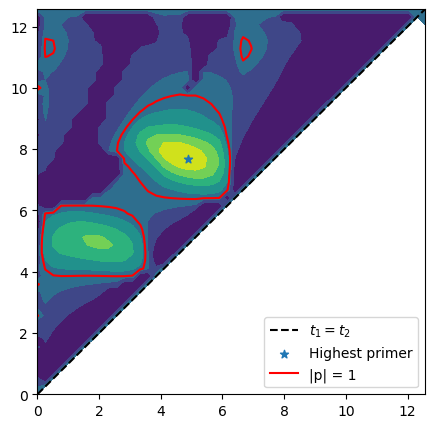

In [7]:
fig = plt.figure(figsize=(5,5))
X,Y = np.meshgrid(t_grid, t_grid)
plt.contourf(X,Y,norm_surrogate_p)
plt.contour(X,Y,norm_surrogate_p, [1], colors='r', linestyles='solid')
plt.savefig("surrogate_primer_halo.png", dpi=600)
plt.plot(t_grid,t_grid, 'k--', label="$t_1=t_2$")
plt.scatter(t_grid[idx2], t_grid[idx1], label="Highest primer", marker="*")
plt.plot([],[], 'r', label="|p| = 1")
plt.legend(loc="lower right")

Revealing all areas where adding two impulses would improve the trajectory leaving all boundary conditions unchanged.

# But is it true?
Where we check that the same trajectory can be improved using three impulses.
In here we optimize a three impulse fixed time trajectory reaching identical conditions as the ones of our original trajectory.  